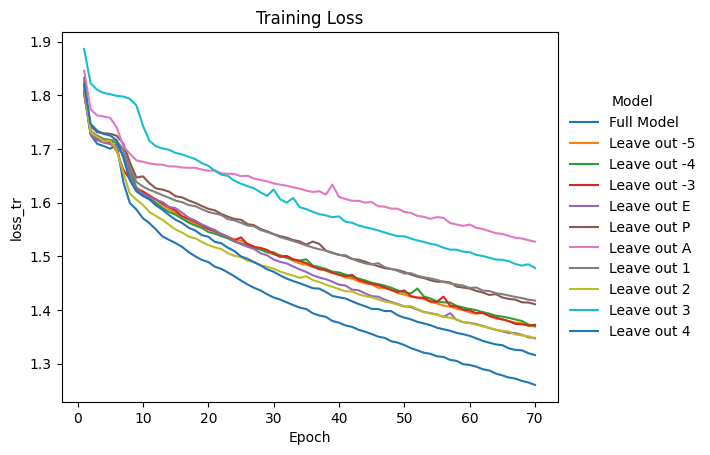

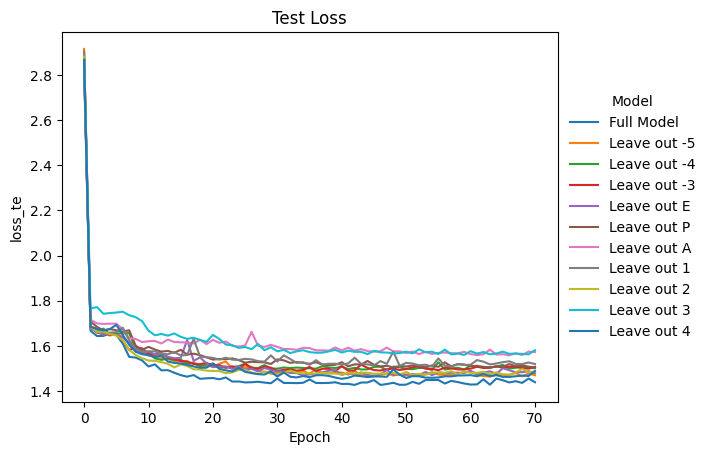

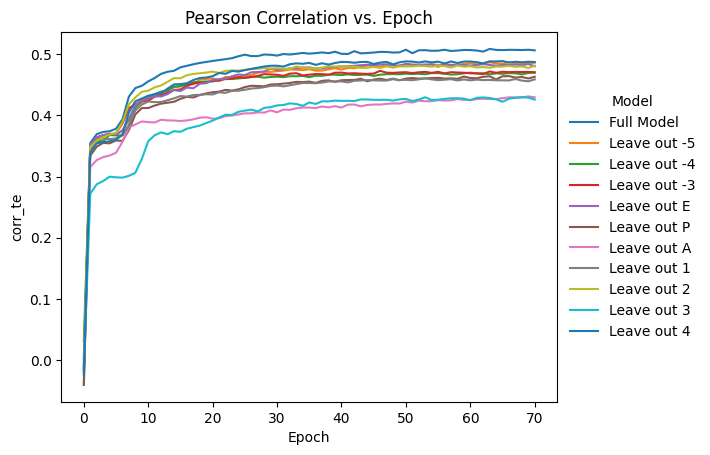

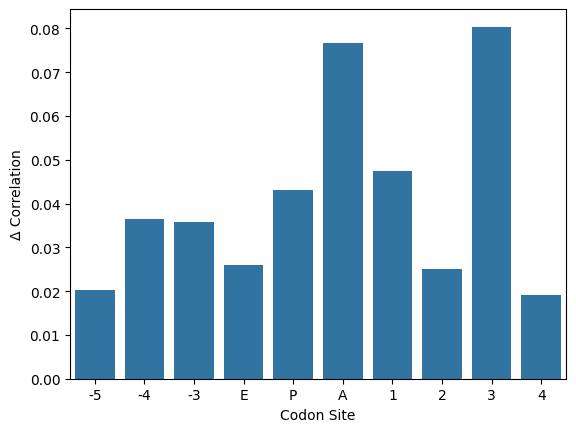

In [2]:
import torch
from torch import nn
import pickle
import numpy as np
from Bio import SeqIO
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import sys

def legend_kwargs():
    # Commonly used kwargs for figure legends
    kwargs = {
        "frameon" : False, 
        "bbox_to_anchor" : (1, 0.5), 
        "loc" : "center left"}
    return kwargs

full_df = pd.read_csv(f"processed-data/thp1/models/ixnos_full_loss_by_epoch.csv", index_col=0)
r_full = full_df.iloc[-1]["corr_te"].item()

named_sites = {
    0: "A",
    -1: "P",
    -2: "E"
}

comps = {}

fig, ax0 = plt.subplots()
ax0.set_title("Training Loss")
ax0.set_xlabel("Training Loss")
fig, ax1 = plt.subplots()
ax1.set_title("Test Loss")
ax1.set_xlabel("Test Loss")
fig, ax2 = plt.subplots()
ax2.set_title("Pearson Correlation vs. Epoch")
ax2.set_xlabel("Pearson Correlation")

sns.lineplot(full_df, x = range(len(full_df)), y="loss_tr", ax=ax0, label="Full Model")
sns.lineplot(full_df, x = range(len(full_df)), y="loss_te", ax=ax1, label="Full Model")
sns.lineplot(full_df, x = range(len(full_df)), y="corr_te", ax=ax2, label="Full Model")

for leaveout in range(-5, 5):
    res = pd.read_csv(f"processed-data/thp1/models/ixnos_leaveout_{leaveout}_loss_by_epoch.csv", index_col=0)
    if leaveout in named_sites.keys():
        leaveout = named_sites[leaveout]
    sns.lineplot(res, x = range(len(res)), y="loss_tr", ax=ax0, label=f"Leave out {leaveout}")
    sns.lineplot(res, x = range(len(res)), y="loss_te", ax=ax1, label=f"Leave out {leaveout}")
    sns.lineplot(res, x = range(len(res)), y="corr_te", ax=ax2, label=f"Leave out {leaveout}")
    r_leaveout = res.iloc[-1]["corr_te"].item()
    delta_r = r_full - r_leaveout
    comps[leaveout] = delta_r

for ax in [ax0, ax1, ax2]:
    ax.legend(title="Model", **legend_kwargs())
    ax.set_xlabel("Epoch")
plt.show()


sns.barplot(comps)
plt.ylabel("\u0394 Correlation")
plt.xlabel("Codon Site")
plt.show()
# plt.bar(
#     comps.keys(), comps.values()
# )